## Title

### Objective

## Table of Contents

- [Data Analysis Project](#data-analysis-project)
  - [Table of Contents](#table-of-contents)
  - [Data Preprocessing](#data-preprocessing)
    - [Data Loading](#data-loading)
    - [Data Inspection](#data-inspection)
    - [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
      - [Data Cleaning](#data-cleaning)
          -[Handling Missing Data and Structural Errors](handling-missing-data-and-structural-errors)
          -[Other Colums cleanup](other-colums-cleanup)
  - [Feature Engineering and Transformation](#feature-engineering-and-transformation)
    - [Discretization](#discretization)
    - [Categorical Encoding](#categorical-encoding)
    - [Variable Transformation](#variable-transformation)
    - [Scaling](#scaling)
    - [Dimensionality Reduction](#dimensionality-reduction)
  - [Model Implementation](#model-implementation)
    - [Supervised Learning](#supervised-learning)
    - [Model Evaluation](#model-evaluation)
  - [Model Optimization](#model-optimization)
    - [Hyperparameter Tuning](#hyperparameter-tuning)
    - [Regularization](#regularization)
    - [Visualizations](#visualizations)
  - [Presentation](#presentation)
    - [Clear Objectives](#clear-objectives)
    - [Model Performance](#model-performance)
    - [Interactivity (Optional)](#interactivity-optional)

---

### Import Dependencies

In [47]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
%matplotlib inline
import seaborn as sns
from scipy.stats import skew, norm
from sklearn.metrics import confusion_matrix, classification_report

---

## Data Preprocessing

### Data Loading
- Load the `Leads.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df_leads = pd.read_csv("Resources/Leads.csv")

# Review the DataFrame
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Data Inspection
- Handle missing values, column types, and summary statistics.

In [3]:
#checking total rows and cols in dataset
df_leads.shape

(9240, 37)

The Leads.csv has 9,240 rows and 37 columns

In [4]:
#data check
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Exploratory Data Analysis (EDA)

#### Data Cleaning

- Remove duplicates, handle outliers, fix structural errors, and deal with missing data.

Reviewing if the Lead Number and Prospect ID column has any duplicate

In [6]:
print(df_leads.columns)

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


In [7]:
# Check for duplicate values in the "Lead Number" column
duplicate_count_LN = df_leads["Lead Number"].duplicated().sum()
print(f"Number of duplicate 'Lead Number' entries: {duplicate_count_LN}")

# Check for duplicate values in the "Lead Number" column
duplicate_count_PID = df_leads["Prospect ID"].duplicated().sum()
print(f"Number of duplicate 'Prospect ID' entries: {duplicate_count_PID}")

Number of duplicate 'Lead Number' entries: 0
Number of duplicate 'Prospect ID' entries: 0


Prospect ID and Lead Number are unique identification numbers, they not relevent to this analysis, so they will be dropped. 

In [8]:
#dropping Lead Number columns 
df_leads.drop(["Lead Number","Prospect ID"], axis=1, inplace = True)
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


Fixing "Select" values, changing them to NaN, this is due to the fact that user did not select any value from the options

In [9]:
# Converting 'Select' values to NaN.
df_leads = df_leads.replace('Select', np.nan)

Changing all columns to lower case

In [10]:
# changing  all columns values to lower case
for col in df_leads.columns:
    df_leads[col] = df_leads[col].apply(lambda s: s.lower() if type(s)==str else s)

##### Handling Missing Data and Structural Errors

In [11]:
#Review null values per column
df_leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [12]:
# Calculate the percentage of null values for each column
null_percentage = (df_leads.isnull().sum() / len(df_leads)* 100) .round(2)

# Display the percentage of null values per column
print(null_percentage)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

Drop columns with more than 45% missing data

In [13]:
# Calculate the percentage of missing values for each column
missing_percentage = df_leads.isnull().sum() / len(df_leads) * 100

# Drop columns that have more than 70% missing values
df_leads = df_leads.loc[:, missing_percentage <= 45]

# Alternatively, use drop() with a list comprehension for clarity
#df_leads = df_leads.drop(columns=[col for col in df_leads.columns if missing_percentage[col] > 45])

# Check the updated DataFrame
print(df_leads.head())

               Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      api      olark chat           no          no   
1                      api  organic search           no          no   
2  landing page submission  direct traffic           no          no   
3  landing page submission  direct traffic           no          no   
4  landing page submission          google           no          no   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity Country  ... Digital Advertisement  \
0  page visited on website 

Reduced from 38 to 27columns from previous cleanups, but not done yet, as some columns might contain important information, will analyze 

##### Analyzing per Data Type (Categorical vs. Numerical)

In [14]:
# New DataFrame for Dtype and null values in the same column
df_null_dtype = pd.DataFrame({
    'Dtype': df_leads.dtypes,
    'Null Values': df_leads.isnull().sum()
})

# Display the summary DataFrame
print(df_null_dtype)

                                                 Dtype  Null Values
Lead Origin                                     object            0
Lead Source                                     object           36
Do Not Email                                    object            0
Do Not Call                                     object            0
Converted                                        int64            0
TotalVisits                                    float64          137
Total Time Spent on Website                      int64            0
Page Views Per Visit                           float64          137
Last Activity                                   object          103
Country                                         object         2461
Specialization                                  object         3380
What is your current occupation                 object         2690
What matters most to you in choosing a course   object         2709
Search                                          

##### Categorical Missing Data





In [15]:
# Filter to show only columns with dtype 'object' and null values greater than 0
df_null_dtype_object_with_nulls = df_null_dtype[(df_null_dtype['Dtype'] == 'object') & (df_null_dtype['Null Values'] > 0)]

# Display the filtered summary DataFrame
print(df_null_dtype_object_with_nulls)

                                                Dtype  Null Values
Lead Source                                    object           36
Last Activity                                  object          103
Country                                        object         2461
Specialization                                 object         3380
What is your current occupation                object         2690
What matters most to you in choosing a course  object         2709
Tags                                           object         3353
City                                           object         3669


##### Categorical Missing Data by column
- [Lead Source](#lead-source)
- [Last Activity](#last-activity)
- [Country](#country)
- [Specialization](#specialization)
- [What is your current occupation](#what-is-your-current-occupation)
- [What matters most to you in choosing a course](#what-matters-most-to-you-in-choosing-a-course)



Lead Quality - assigned by intuition of an employee, NaN values will be imputed by "Not Sure".

##### Lead Source !!!- data impu..

In [16]:
#checking for mode value
df_leads['Lead Source'].value_counts()

Lead Source
google               2873
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
facebook               55
bing                    6
click2call              4
social media            2
live chat               2
press_release           2
pay per click ads       1
blog                    1
welearn                 1
welearnblog_home        1
youtubechannel          1
testone                 1
nc_edm                  1
Name: count, dtype: int64

In [17]:

# Standardize category names to lowercase
df_leads['Lead Source'] = df_leads['Lead Source'].str.lower()

# Replace variations with consistent names
df_leads['Lead Source'] = df_leads['Lead Source'].replace({'google': 'google', 'bing': 'bing'})
df_leads['Lead Source'] = df_leads['Lead Source'].replace({'facebook': 'social media'})
df_leads['Lead Source'] = df_leads['Lead Source'].replace({'youtube': 'social media'})

# Remove rows where 'Lead Source' has irrelevant or test values
df_leads = df_leads[~df_leads['Lead Source'].isin(['testone'])]

# Replace synonyms with a consistent value
df_leads['Lead Source'] = df_leads['Lead Source'].replace({'welearnblog_home': 'welearn', 'WeLearn': 'welearn'})


# Recheck the value counts
print(df_leads['Lead Source'].value_counts())


Lead Source
google               2873
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
social media           57
bing                    6
click2call              4
press_release           2
welearn                 2
live chat               2
youtubechannel          1
blog                    1
pay per click ads       1
nc_edm                  1
Name: count, dtype: int64


In [18]:
# Define a cutoff value
cutoff_value = 50

# Create a list of lead sources to be replaced with 'Other'
lead_sources_to_replace = df_leads['Lead Source'].value_counts()[df_leads['Lead Source'].value_counts() < cutoff_value].index.tolist()

# Replace the infrequent lead sources with 'Other'
df_leads['Lead Source'] = df_leads['Lead Source'].apply(lambda x: 'Other' if x in lead_sources_to_replace else x)

# Check the updated value counts
print(df_leads['Lead Source'].value_counts())

Lead Source
google              2873
direct traffic      2543
olark chat          1755
organic search      1154
reference            534
welingak website     142
referral sites       125
social media          57
Other                 20
Name: count, dtype: int64


##### Last Activity

In [19]:
# Last Activity checking for mode value
df_leads['Last Activity'].value_counts()

Last Activity
email opened                    3437
sms sent                        2745
olark chat conversation          973
page visited on website          639
converted to lead                428
email bounced                    326
email link clicked               267
form submitted on website        116
unreachable                       93
unsubscribed                      61
had a phone conversation          30
approached upfront                 9
view in browser link clicked       6
email received                     2
email marked spam                  2
visited booth in tradeshow         1
resubscribed to emails             1
Name: count, dtype: int64

In [20]:
# Impute nan values with email opened  
df_leads['Last Activity'] = df_leads['Last Activity'].replace(np.nan ,'Email Opened')

In [21]:
# Last Activity checking for mode value
df_leads['Last Activity'].value_counts()

Last Activity
email opened                    3437
sms sent                        2745
olark chat conversation          973
page visited on website          639
converted to lead                428
email bounced                    326
email link clicked               267
form submitted on website        116
Email Opened                     103
unreachable                       93
unsubscribed                      61
had a phone conversation          30
approached upfront                 9
view in browser link clicked       6
email received                     2
email marked spam                  2
visited booth in tradeshow         1
resubscribed to emails             1
Name: count, dtype: int64

##### Country

In [22]:
# country 
df_leads.Country.value_counts()

Country
india                   6491
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
hong kong                  7
bahrain                    7
oman                       6
france                     6
unknown                    5
south africa               4
nigeria                    4
germany                    4
kuwait                     4
canada                     4
sweden                     3
china                      2
asia/pacific region        2
uganda                     2
bangladesh                 2
italy                      2
belgium                    2
netherlands                2
ghana                      2
philippines                2
russia                     1
switzerland                1
vietnam                    1
denmark                    1
tanzania                   1
liberia                    1
malays

In [23]:
#imputing missing values with India as it's the mode
df_leads['Country'] = df_leads['Country'].replace(np.nan,'india')

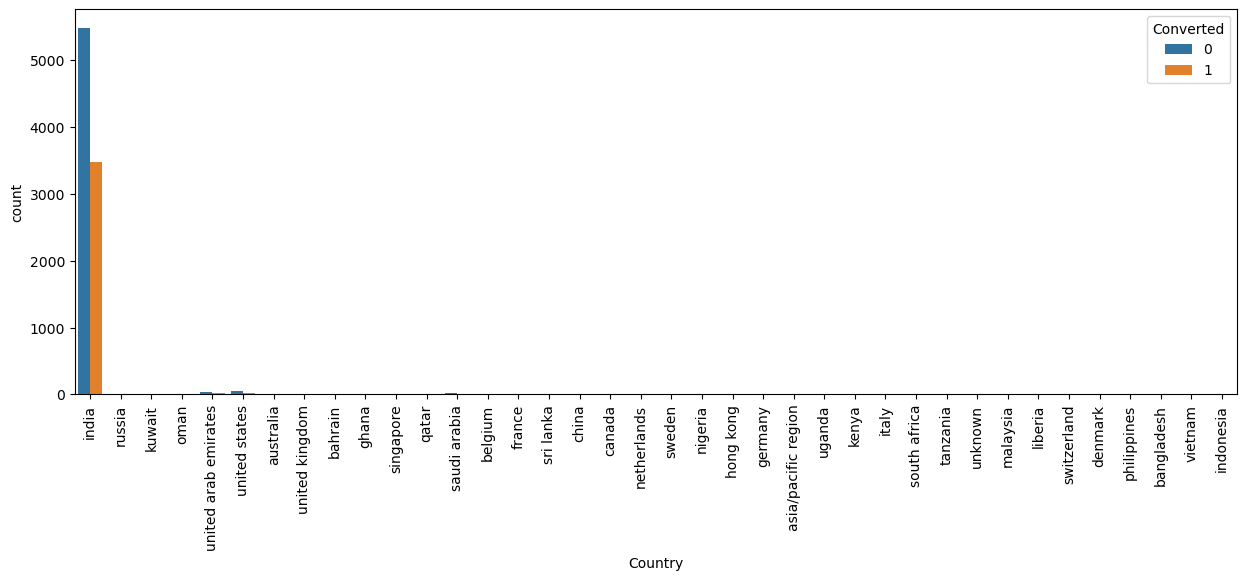

In [24]:
#plot  spread of Country after replacing null values

fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = 'Country', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()

In [25]:
# Calculate the percentage of rows with "India" in the Country column
india_percentage = (df_leads['Country'].value_counts()['india'] / df_leads['Country'].count()) * 100

# Print the percentage
print(f"'India' within Country column: {india_percentage:.2f}%")

'India' within Country column: 96.89%


Because >96% of the data is mapped as india, making Country data heavily skewed and not required for the modeling process, will drop this column from the DF. 

In [26]:
#creating a list of columns to be droppped

cols_to_drop=['Country']

In [27]:
# dropping country column
df_leads.drop('Country',axis=1,inplace =True)

##### Specialization

In [28]:
#describe specialization
df_leads.Specialization.describe()

count                   5859
unique                    18
top       finance management
freq                     976
Name: Specialization, dtype: object

In [29]:
# Imputing NaN values with "Not Specified"

df_leads['Specialization'] = df_leads['Specialization'].replace(np.nan, 'Not Specified')

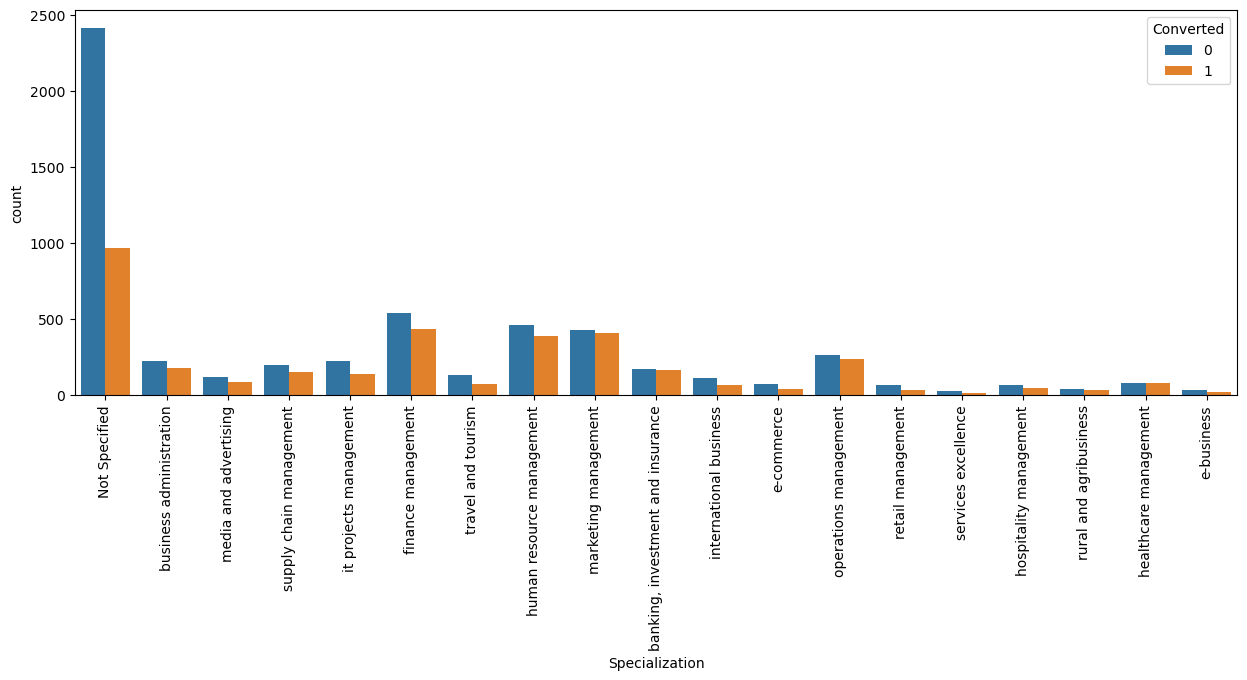

In [30]:
#plotting spread of Specialization columnn 

fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = 'Specialization', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()



In [31]:
#combining Management Specializations because they show similar trends

df_leads['Specialization'] = np.where(df_leads['Specialization'].isin(['finance management', 'human resource management',
                                                                       'marketing management', 'operations management',
                                                                       'it projects management', 'supply chain management',
                                                                       'healthcare Management', 'hospitality management',
                                                                       'retail management']),
                                       'Management_Specializations', df_leads['Specialization'])

In [32]:
# specializations
df_leads.Specialization.value_counts()

Specialization
Management_Specializations           4093
Not Specified                        3380
business administration               403
banking, investment and insurance     338
media and advertising                 203
travel and tourism                    203
international business                178
healthcare management                 159
e-commerce                            112
rural and agribusiness                 73
e-business                             57
services excellence                    40
Name: count, dtype: int64

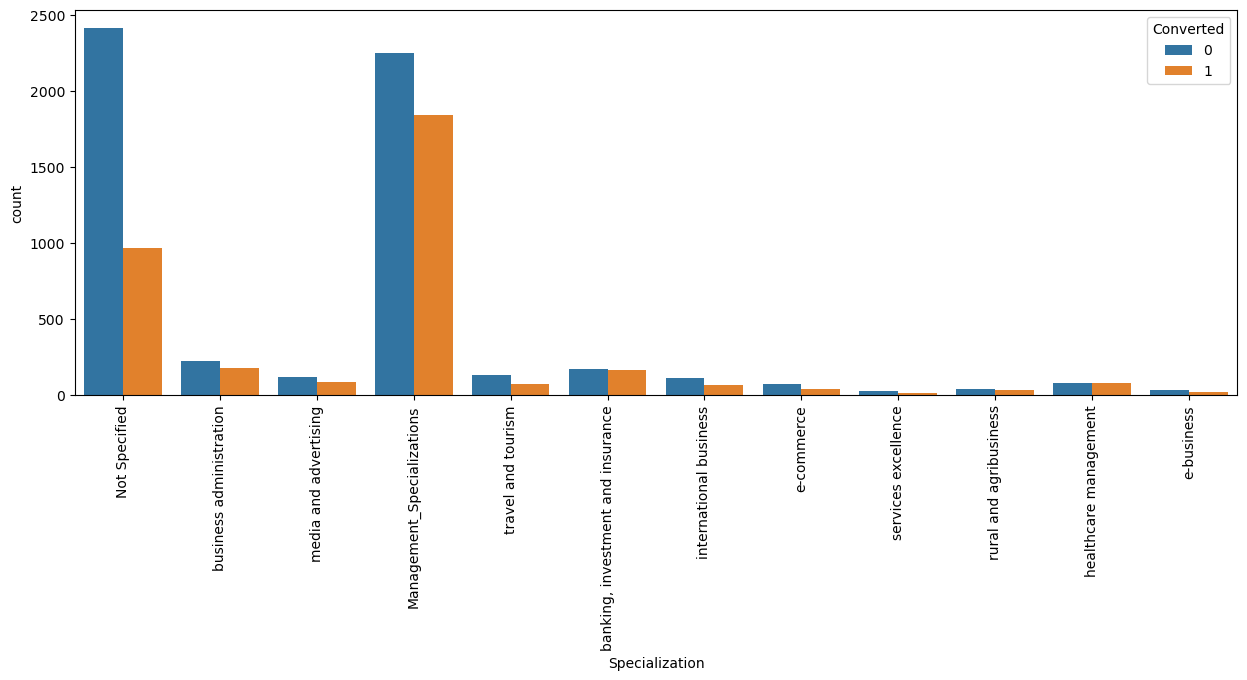

In [33]:
#plotting the spred of new Specialization columnn 

fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = 'Specialization', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()


!!!We see that specialization with Management in them have higher number of leads as well as leads converted. So this is definitely a significant variable and should not be dropped.

Focus should be more on the Specialization with high conversion rate.

##### What is your current occupation?

In [34]:
#What is your current occupation

df_leads['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
unemployed              5599
NaN                     2690
working professional     706
student                  210
other                     16
housewife                 10
businessman                8
Name: count, dtype: int64

In [35]:
# Imputing NaN values with "unemployed"

df_leads['What is your current occupation'] = df_leads['What is your current occupation'].replace(np.nan, 'unemployed')

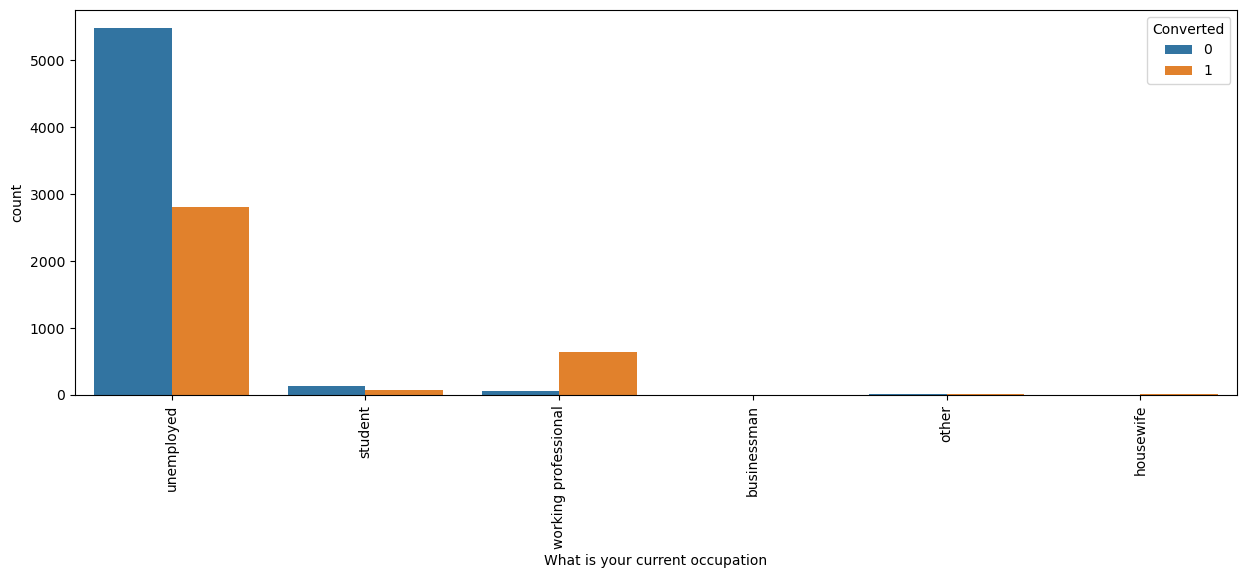

In [36]:
#plotting spread of Specialization columnn 

fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = 'What is your current occupation', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()

!!!!Working Professionals going for the course have high chances of joining it.
Unemployed leads are the most in terms of Absolute numbers.Working Professionals going for the course have high chances of joining it.
Unemployed leads are the most in numbers but has around 30-35% conversion rate.

##### What matters most to you in choosing a course

In [37]:
#checking value counts

df_leads['What matters most to you in choosing a course'].value_counts(dropna=False)

What matters most to you in choosing a course
better career prospects      6527
NaN                          2709
flexibility & convenience       2
other                           1
Name: count, dtype: int64

In [38]:
# Imputing NaN values with "unemployed"

df_leads['What matters most to you in choosing a course'] = df_leads['What matters most to you in choosing a course'].replace(np.nan, 'better career prospects')

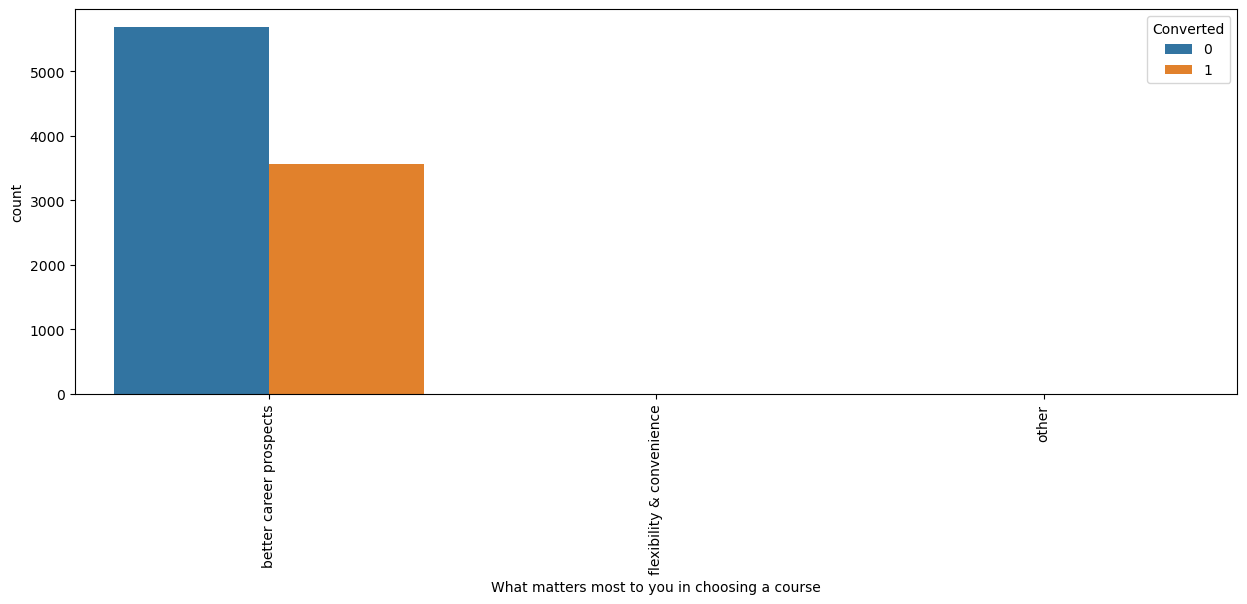

In [39]:
#plotting spread of What matters most to you in choosing a course columnn 

fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = 'What matters most to you in choosing a course', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()

Highly skewed column, will add to drop list

In [40]:
#Append to the cols_to_drop List
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Country', 'What matters most to you in choosing a course']

In [41]:
# !!!!!!!!!!!!!!!!!!!!!!!
# 'How did you hear about X Education' impute 'other' as if leads has not selected means it is not in options
leads_data['How did you hear about X Education']=leads_data['How did you hear about X Education'].fillna('other')

NameError: name 'leads_data' is not defined

##### Numerical Missing Data



In [42]:
# Filter to show only columns with dtype 'float64' or 'int64' and null values greater than 0
df_null_dtype_numeric_with_nulls = df_null_dtype[
    ((df_null_dtype['Dtype'] == 'float64') | (df_null_dtype['Dtype'] == 'int64')) & (df_null_dtype['Null Values'] > 0)
]

# Display the filtered summary DataFrame
print(df_null_dtype_numeric_with_nulls)

                        Dtype  Null Values
TotalVisits           float64          137
Page Views Per Visit  float64          137


##### Numerical Data cleaning 
- [TotalVisits](#totalvisits)
- [Page Views Per Visit](#page-views-per-visit)

TotalVisits
Page Views Per Visit
Asymmetrique columns have values 1, 2, 3 which is score assigned to each customer based on their activity and their profile. Will replace blank with 0 score.
Page Visits nulls will be be replaced with 0.

##### TotalVisits 

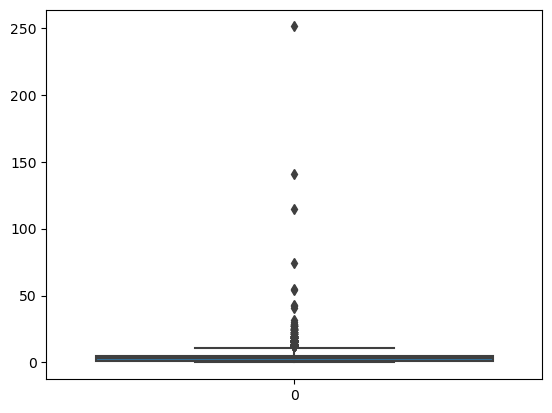

In [54]:
#Total Visits
#visualizing spread of variable

sns.boxplot(df_leads['TotalVisits'])
plt.show()


There are outliers in the data, cap the outliers to 95%for analysis

In [63]:
#checking percentile values for "Total Visits"

df_leads['TotalVisits'].describe(percentiles=[.05,.25, .5, .75,.95, .99])

count    9102.000000
mean        3.181718
std         2.781922
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
95%        10.000000
99%        10.000000
max        10.000000
Name: TotalVisits, dtype: float64

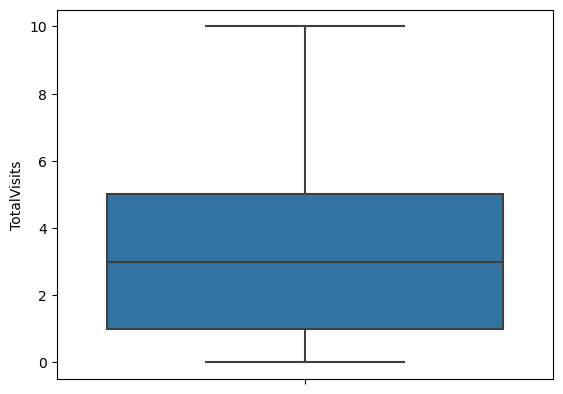

In [58]:
#Outlier Treatment: Remove top & bottom 5% of the Column Outlier values

Q3 = df_leads.TotalVisits.quantile(0.99)
df_leads = df_leads[(df_leads.TotalVisits <= Q3)]
Q1 = df_leads.TotalVisits.quantile(0.01)
df_leads = df_leads[(df_leads.TotalVisits >= Q1)]
sns.boxplot(y=df_leads['TotalVisits'])
plt.show()

<Axes: xlabel='Converted', ylabel='TotalVisits'>

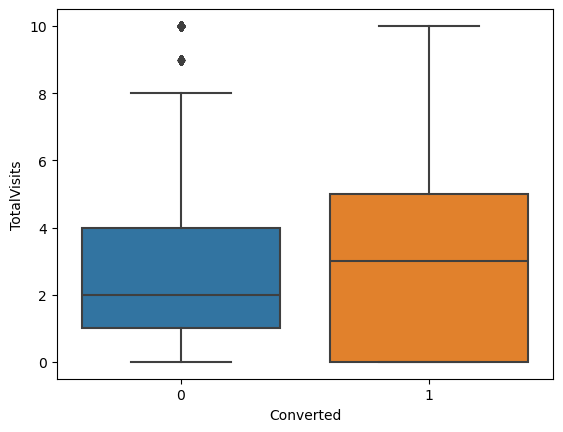

In [77]:

sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df_leads)

!!!The Median for converted 

c:\Users\Colli\new_anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


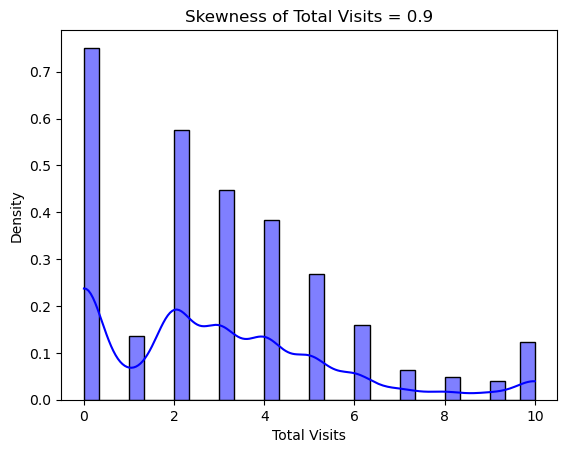

In [80]:
# Calculate skewness
skewness = skew(df_leads['TotalVisits'])
skewness_rounded = round(skewness, 2)

# Plotting the distribution
sns.histplot(df_leads['TotalVisits'], kde=True,  color='blue', stat="density", bins=30)
plt.title(f"Skewness of Total Visits = {skewness_rounded}")
plt.xlabel('Total Visits')
plt.ylabel('Density')
plt.show()

Most users/customers are visiting fewer times, with very few having higher visit counts.
The positive skew indicates that there might be some outliers or a small group of users who have a significantly higher number of visits compared to the rest.
This distribution can be useful in understanding the behavior of users/customers, showing that a majority do not make frequent visits, while a smaller proportion are more engaged.

##### Page Views Per Visit

In [65]:
df_leads['Page Views Per Visit'].describe()

count    9102.000000
mean        2.362805
std         2.161536
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<Axes: >

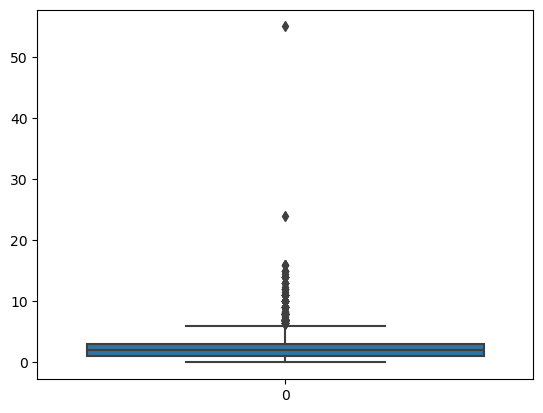

In [67]:
sns.boxplot(df_leads['Page Views Per Visit'])

There are outliers in the data, cap the outliers to 95%for analysis

In [71]:
#checking percentile values for "Page Views Per Visit"

df_leads['Page Views Per Visit'].describe(percentiles=[.05,.25, .5, .75,.95, .99])

count    9102.000000
mean        2.362805
std         2.161536
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

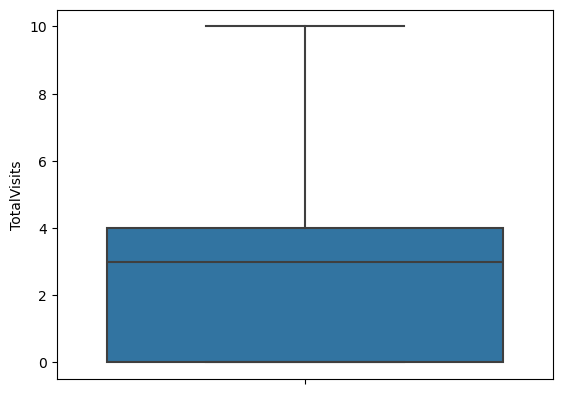

In [74]:
#Outlier Treatment: Remove top & bottom 5% of the Column Outlier values

Q3 = df_leads["Page Views Per Visit"].quantile(0.95)
df_leads = df_leads[(df_leads["Page Views Per Visit"] <= Q3)]
Q1 = df_leads["Page Views Per Visit"].quantile(0.05)
df_leads = df_leads[(df_leads["Page Views Per Visit"] >= Q1)]
sns.boxplot(y=df_leads['TotalVisits'])
plt.show()

<Axes: xlabel='Converted', ylabel='Page Views Per Visit'>

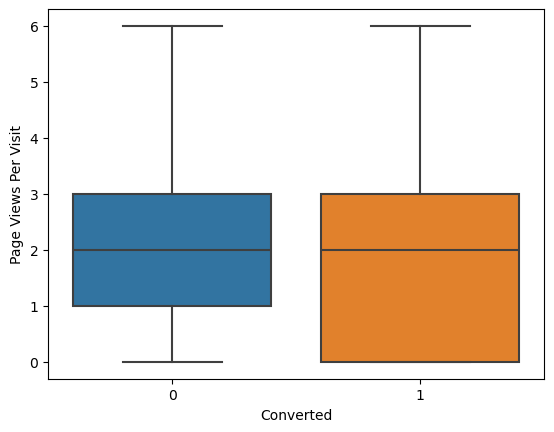

In [76]:

sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df_leads)

c:\Users\Colli\new_anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


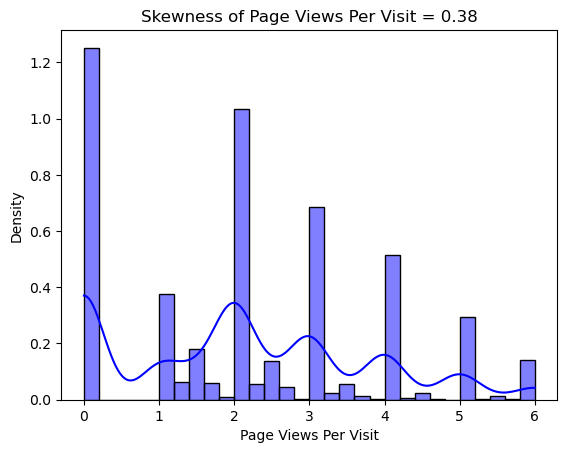

In [81]:
# Calculate skewness
skewness = skew(df_leads['Page Views Per Visit'])
skewness_rounded = round(skewness, 2)

# Plotting the distribution
sns.histplot(df_leads['Page Views Per Visit'], kde=True,  color='blue', stat="density", bins=30)
plt.title(f"Skewness of Page Views Per Visit = {skewness_rounded}")
plt.xlabel('Page Views Per Visit')
plt.ylabel('Density')
plt.show()

!!Median for converted and unconverted leads is the same.
Nothing can be said specifically for lead conversion from Page Views Per Visit
Most users seem to view 1-2 pages per visit, with fewer users viewing more than that.
The distribution has some minor peaks indicating that there are distinct groups of users who tend to view a specific number of pages, such as 2, 3, or 4 pages, before exiting.
Overall, the skewness is low, which means that while the data is slightly skewed to the right, it is relatively balanced, with no extreme outliers.
This suggests that while most users view only a few pages per visit, there is still a significant portion of users viewing a moderate number of pages, indicating a varied level of engagement across different visitors.

### Other Colums cleanup

##### Tags

In [89]:
#checking value counts of Tag variable
df_leads['Tags'].value_counts(dropna=False)


Tags
NaN                                                  3230
will revert after reading the email                  1943
ringing                                              1124
interested in other courses                           490
already a student                                     455
closed by horizzon                                    293
switched off                                          230
busy                                                  174
lost to eins                                          169
not doing further education                           139
interested  in full time mba                          110
graduation in progress                                105
invalid number                                         73
diploma holder (not eligible)                          62
wrong number given                                     42
opp hangup                                             30
number not provided                                    25
in touch 

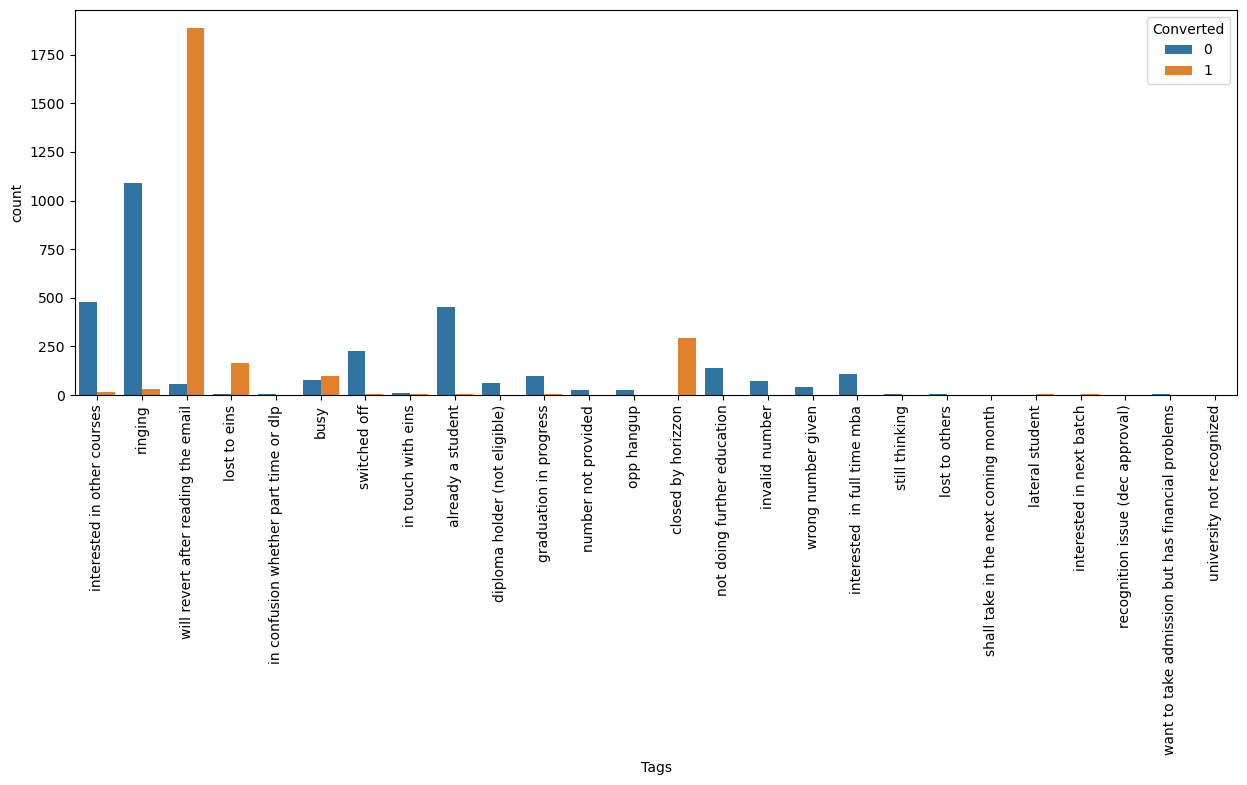

In [90]:
#plotting spread of Tags columnn 

fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = 'Tags', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()

##### Lead Source

In [91]:
#check value counts of Lead Source column

df_leads['Lead Source'].value_counts(dropna=False)

Lead Source
google              2793
direct traffic      2444
olark chat          1753
organic search       992
reference            442
welingak website     129
referral sites       109
social media          32
NaN                   29
Other                 19
Name: count, dtype: int64

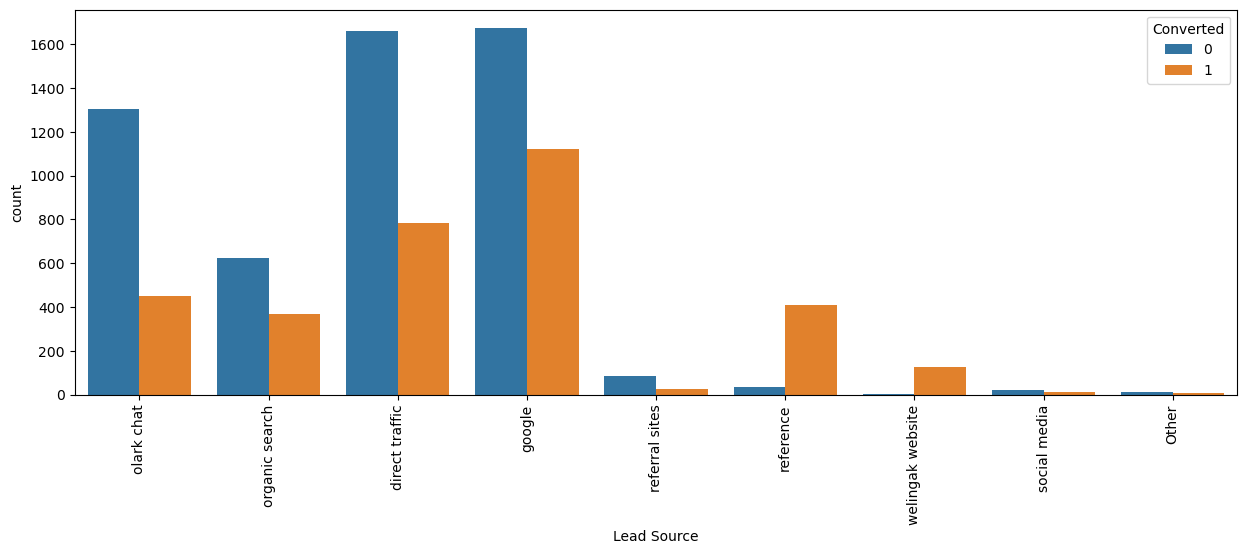

In [92]:
#plotting spread of Lead Source columnn 

fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = 'Lead Source', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()

!!***Google and direct trafic most leads come from
high conversion rates for refernce welingak website.  
 improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

---

### Correlation

In [97]:
sample_size = min(len(df_leads), 10000)
subset = df_leads.sample(n=sample_size, random_state=42)
correlation_matrix = subset.corr()

ValueError: could not convert string to float: 'lead add form'

### Heatmap

In [94]:
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

NameError: name 'correlation_matrix' is not defined

## Feature Engineering and Transformation

### Discretization
- Convert continuous variables into discrete ones if necessary (e.g., binning).


### Categorical Encoding
- Use one-hot encoding for categorical features.

### Variable Transformation
- Apply log or square-root transformations for skewed data.

### Scaling
- Normalize or standardize numerical features.

### Dimensionality Reduction
- Use Principal Component Analysis (PCA) to reduce feature dimensions.

## Model Implementation

### Supervised Learning
- Logistic Regression, Decision Trees, Random Forest, Neural Networks.

### Model Evaluation
- Calculate baseline metric (accuracy, precision, recall) and performance on unseen data.


## Model Optimization

### Hyperparameter Tuning
- Grid search, random search.

### Regularization
- Optional L2 regularization.

### Visualizations
- Learning curves, feature importance, showing iterative improvements.

## Presentation

### Clear Objectives
- Communicate the problem statement and solution.

### Model Performance
- Use visualizations (learning curves, comparison of models).

### Interactivity (Optional)
- If meaningful, incorporate interactive visualizations.